# Sentiment Analysis - Logistic Regression

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from nltk.corpus import stopwords
import nltk
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("final_data.csv")

In [3]:
df.head()

,Unnamed: 0,Id,Title,User_id,review/helpfulness,review/score,review/time,review/summary,review/text,description,authors,publisher,publishedDate,categories,ratingsCount,compound,Sentiment
0,0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,NaN,['Julie Strain'],NaN,1996,['Comics & Graphic Novels'],2.0,0.9408,positive
1,1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005-01-01,['Biography & Autobiography'],2.0,0.9876,positive
2,2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005-01-01,['Biography & Autobiography'],2.0,0.9932,positive
3,3,0826414346,Dr. Seuss: American Icon,A2MVUWT453QH61,7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005-01-01,['Biography & Autobiography'],2.0,0.9782,positive
4,4,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005-01-01,['Biography & Autobiography'],2.0,0.9604,positive


For training the supervised learning Logistic Regression model, we see that the input (X) is the textual data, i.e. the 'review/text' column of the data, and the labels (y) are present in the 'sentiment' column of the data

### Data Cleaning

- Filling all the missing values in 'review/text' column with the placeholder string "No Review Text". 
- Filling all the missing values in the 'Sentiment' column with the mode of the column

In [4]:
df['review/text'].fillna("No review text", inplace=True)

mode = df['Sentiment'].mode()[0]
df['Sentiment'].fillna(mode, inplace = True)

### Train-Test Split

#### Choosing an 80:20 split for the development and the test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df['review/text'], df['Sentiment'], test_size = 0.2, random_state = 42, stratify = df['Sentiment'])

### Text Vectorization and Stopwords Removal

- Vectorizing the textual data using TFIDF Vectorizer
- Removing the stopwords

In [6]:
stop_words = stopwords.words('english')

In [7]:
vectorizer = TfidfVectorizer(stop_words = stop_words, max_features = 1000)

### Grid Search

- Using the 'Stochastic Average Gradient descent solver with Acceleration' for Logistic Regression as it converges faster for very large datasets, and also supports both l1 and l2 penalties. 
- Employing a 5-Fold Cross Validation. Choosing 5-Fold over 10-Fold due to the enormous size of the dataset

In [17]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
pipeline = Pipeline([
    ('tfidf', vectorizer),
    ('scaler', StandardScaler(with_mean=False)),  
    ('classifier', LogisticRegression(solver='saga', max_iter=100))
])

parameters = {
    'classifier__C': [0.1, 1],
    'classifier__penalty': ['l1', 'l2']
}

encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
y_test_enc = encoder.transform(y_test)

In [18]:
grid_search = GridSearchCV(pipeline, parameters, cv = 5, scoring = 'accuracy', verbose = 2)

In [19]:
grid_search.fit(X_train, y_train_enc)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..........classifier__C=0.1, classifier__penalty=l1; total time=24.1min
[CV] END ..........classifier__C=0.1, classifier__penalty=l1; total time=21.2min
[CV] END ..........classifier__C=0.1, classifier__penalty=l1; total time=25.1min
[CV] END ..........classifier__C=0.1, classifier__penalty=l1; total time=21.5min
[CV] END ..........classifier__C=0.1, classifier__penalty=l1; total time=21.2min
[CV] END ..........classifier__C=0.1, classifier__penalty=l2; total time= 8.1min
[CV] END ..........classifier__C=0.1, classifier__penalty=l2; total time= 7.1min
[CV] END ..........classifier__C=0.1, classifier__penalty=l2; total time= 7.7min
[CV] END ..........classifier__C=0.1, classifier__penalty=l2; total time= 7.0min
[CV] END ..........classifier__C=0.1, classifier__penalty=l2; total time= 6.8min


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ............classifier__C=1, classifier__penalty=l1; total time=28.7min


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ............classifier__C=1, classifier__penalty=l1; total time=28.6min


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ............classifier__C=1, classifier__penalty=l1; total time=28.9min


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ............classifier__C=1, classifier__penalty=l1; total time=28.9min


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ............classifier__C=1, classifier__penalty=l1; total time=28.9min
[CV] END ............classifier__C=1, classifier__penalty=l2; total time= 7.9min
[CV] END ............classifier__C=1, classifier__penalty=l2; total time= 7.1min
[CV] END ............classifier__C=1, classifier__penalty=l2; total time= 7.0min
[CV] END ............classifier__C=1, classifier__penalty=l2; total time= 7.8min
[CV] END ............classifier__C=1, classifier__penalty=l2; total time= 7.8min


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(max_features=1000,
                                                        stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
                                                                    'yours',
                                                                    'yourself',
                                                                    'yourselves',
                                                                    'he', 'him',
                                                                    'his',
                                                                    'himself',
                                                                    'she',
                                                                    "she's",
                                                                    'her',
                                                                    'hers',
                                                                    'herself',
                                                                    'it',
                                                                    "it's",
                                                                    'its',
                                                                    'itself', ...])),
                                       ('scaler',
                                        StandardScaler(with_mean=False)),
                                       ('classifier',
                                        LogisticRegression(solver='saga'))]),
             param_grid={'classifier__C': [0.1, 1],
                         'classifier__penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=2)

### Evaluating the Best Model from Grid Search

In [21]:
best_model = grid_search.best_estimator_

In [22]:
y_pred = best_model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test_enc, y_pred)
report = classification_report(y_test_enc, y_pred)

In [26]:
print("Accuracy on Test Set: ", accuracy)
print("Classification Report on Test Set:")
print(report)

Accuracy on Test Set:  0.8708357601660364
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.68      0.41      0.52     70886
           1       0.57      0.07      0.13      9808
           2       0.89      0.97      0.93    406910

    accuracy                           0.87    487604
   macro avg       0.72      0.49      0.52    487604
weighted avg       0.85      0.87      0.85    487604



#### The best model from grid search achieves a good accuracy of 87% on the dataset, considering the size of the dataset. However, we see that that the Precision, Recall and F1-Scores for the neutral class. The model achieves great precision, recall and f1-scores for the positive class. However, this variation is simply because the dataset is highly imbalanced, and 83% of the reviews have a positive sentiment.

## TPR VS FPR Curve

#### ROC Curve is created for Binary Classification problems. However, we know that there are three sentiment labels: Negative, Neutral and Positive. Therefore, this problem is a multi-class classification problem. Therefore, converting this multi-class classification problem into a One vs Rest (OvR) Binary Classification problem, and we are plotting the ROC curve for the three cases.

In [31]:
y_pred_prob = best_model.predict_proba(X_test)[:,2]

In [43]:
import numpy as np
classes = np.unique(y_test)
print(classes)

['negative' 'neutral' 'positive']


In [47]:
from sklearn.preprocessing import label_binarize
y_test_binarized = label_binarize(y_test, classes = classes)
print(y_test_binarized)

[[0 0 1]
 [0 0 1]
 [0 0 1]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [62]:
# computing the ROC curve and the AUC for each of the three classes

from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = best_model.predict_proba(X_test)
n_classes = y_test_binarized.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

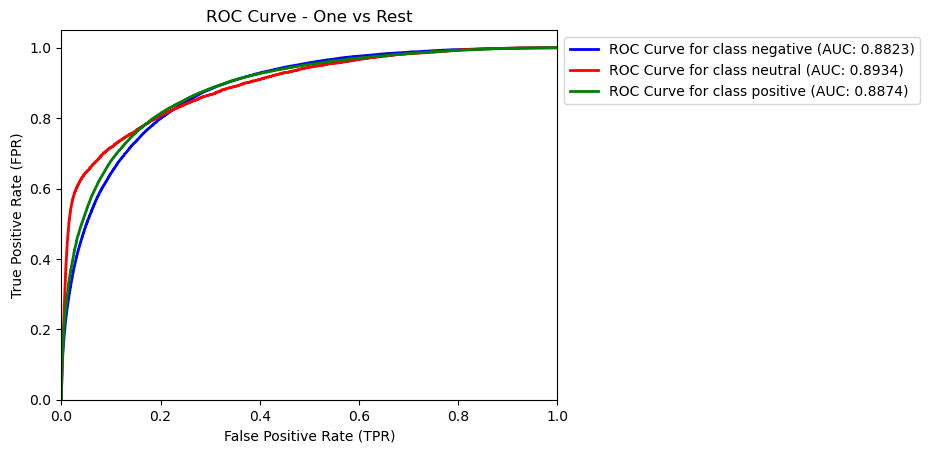

In [71]:
# color context:
# blue - class 0 - negative sentiment
# red - class 1 - neutral sentiment
# green - class 2 - positive sentiment

import matplotlib.pyplot as plt
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color = color, lw = 2, label = 'ROC Curve for class {0} (AUC: {1:0.4f})'.format(classes[i], roc_auc[i]))

#plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (TPR)')
plt.ylabel('True Positive Rate (FPR)')
plt.title('ROC Curve - One vs Rest')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

#### We see that the AUC Score of the minority class (Neutral Sentiment) is the highest. This means that the best model obtained from the grid search has learned to generalize on the patterns present in the data, and has not over fitted. We see that the AUC Score of the Negative Sentiment class is not too far from the AUC Score of the majority class (Positive Sentiment). This again implies that the model has learned to generalize well.